In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
f = pd.read_excel('survey-data.xlsx')
f

,Study hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [3]:
X = np.array([f['Study hours'].values])
X_bar = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)

Y = f['Pass'].values

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def logistic_regression(x_bar, y, w_init, eta, activation_function, tol = 1e-4, check_w_after = 10, max_iterations = 1000):
    w = [w_init]
    N = x_bar.shape[1]
    dim = x_bar.shape[0]
    it = 0
    while it < max_iterations:
        # mix data 
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = x_bar[:, i].reshape(dim, 1)
            yi = y[i]
            zi = activation_function(np.dot(w[-1].T, xi))
            w_new = w[-1] - eta*((zi - yi)*xi)
            it += 1
            # stopping criteria
            if it % check_w_after == 0:          
                if np.linalg.norm(w_new - w[-check_w_after]) < tol: # Compare value of current value and the 1st value in the 10-member array
                    return w
            w.append(w_new)
    return w, it

In [5]:
n_features = X_bar.shape[0]
w_init = np.random.rand(1,n_features)
learning_rate = 0.05
w, epochs = logistic_regression(X_bar, Y, w_init.T, learning_rate, sigmoid, 1e-6, 10)
print('Predicted probabilites of passing for the dataset:', sigmoid(np.dot(w[-1].T, X_bar)))

Predicted probabilites of passing for the dataset: [[0.09223663 0.11874548 0.15160064 0.19157022 0.23910783 0.29414963
  0.29414963 0.35593481 0.42292192 0.49286857 0.56309552 0.63088074
  0.69386673 0.75035785 0.84091426 0.8751529  0.90287376 0.92496724
  0.94235594 0.96638599]]


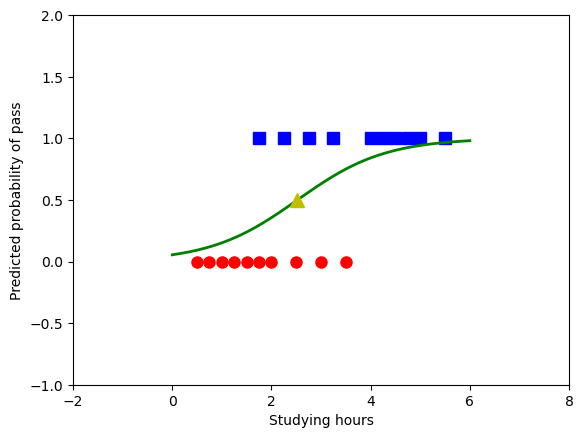

In [6]:
X0 = X_bar[1, np.where(Y == 0)][0]
Y0 = Y[np.where(Y == 0)]
X1 = X_bar[1, np.where(Y == 1)][0]
Y1 = Y[np.where(Y == 1)]

plt.plot(X0, Y0, 'ro', markersize = 8)
plt.plot(X1, Y1, 'bs', markersize = 8)

xx = np.linspace(0, 6, 1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
threshold = -w0/w1
yy = sigmoid(w0 + w1*xx)
plt.axis([-2, 8, -1, 2])
plt.plot(xx, yy, 'g-', linewidth = 2)
plt.plot(threshold, .5, 'y^', markersize = 10)
plt.xlabel('Studying hours')
plt.ylabel('Predicted probability of pass')
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression

In [54]:
X_train = np.concatenate((np.zeros((1, X.shape[1])), X), axis=0)

In [56]:
model = LogisticRegression(random_state=0).fit(X_train.T, Y)
print('The retrieved coefficients from the sklearn library model w: [%.2f, %.2f] and accuracy score: %.2f' %(model.intercept_, model.coef_[:,1], model.score(X_bar.T, Y)))

model.coef_[:,1], model.intercept_ = w[-1].T[0,1], w[-1].T[0,0]
print('The retrieved coefficients from the manually built model w: [%.2f, %.2f] and accuracy score: %.2f' %(model.intercept_, model.coef_[:,1], model.score(X_bar.T, Y)))

The retrieved coefficients from the sklearn library model w: [-3.14, 1.15] and accuracy score: 0.80
The retrieved coefficients from the manually built model w: [-2.85, 1.13] and accuracy score: 0.80
